In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [2]:
print(tf.__version__)

2.15.0


In [3]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
## Feature Engineering

geography = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [8]:
## Concatenate these variables with dataframe

X = X.drop(['Geography' , 'Gender'] , axis = 1)

In [9]:
X = pd.concat([X,geography,gender] , axis = 1)

In [10]:
X.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,0,0


In [11]:
## Splitting the dataset into training set and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [12]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [13]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
## Part 2 Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [18]:
## Lets initialize the ANN
classifier = Sequential()


In [19]:
## Adding the input layers

classifier.add(Dense(units = 11, activation = 'relu'))

In [20]:
## First hidden layer

classifier.add(Dense(units = 7, activation = "relu"))

## Second Hidden layer

classifier.add(Dense(units = 6, activation = "relu"))

In [21]:
## Adding the output Layer

classifier.add(Dense(1,activation="sigmoid"))

In [22]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [23]:
classifier.compile(optimizer = opt , loss = "binary_crossentropy", metrics = ["accuracy"])

In [24]:
# Early Stopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [25]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33 , batch_size = 10, epochs = 1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4331 - accuracy: 0.8104 - val_loss: 0.4051 - val_accuracy: 0.8194
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3724 - accuracy: 0.8455 - val_loss: 0.3888 - val_accuracy: 0.8455
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3541 - accuracy: 0.8535 - val_loss: 0.3686 - val_accuracy: 0.8466
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3504 - accuracy: 0.8576 - val_loss: 0.3693 - val_accuracy: 0.8455
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3458 - accuracy: 0.8559 - val_loss: 0.3674 - val_accuracy: 0.8417
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3469 - accuracy: 0.8593 - val_loss: 0.3627 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3454 - accuracy: 0.8559 - val_loss: 0.3688 - val_accuracy:

In [26]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


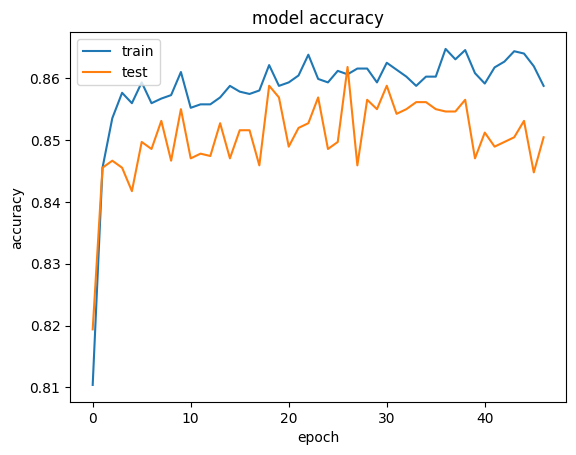

In [27]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

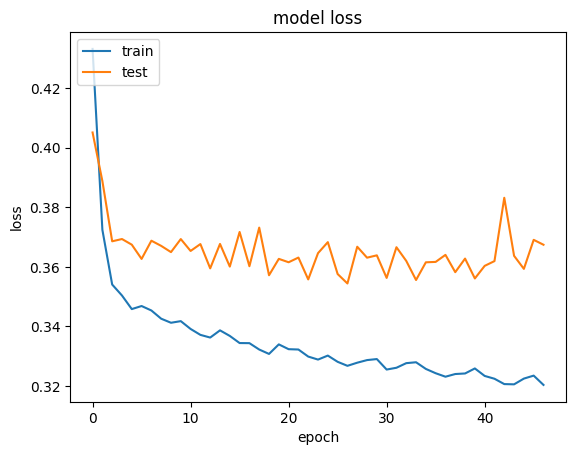

In [28]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1524,   71],
       [ 212,  193]])

In [32]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8585

In [33]:
## Get the weights

classifier.get_weights()

[array([[ 0.33021736, -0.8042507 , -0.22554156, -1.0098655 ,  0.0769098 ,
         -0.19894463, -0.24654108, -0.03517189,  0.5018334 ,  0.07807709,
         -0.23972519],
        [ 2.7987626 ,  2.9739647 , -2.3039994 ,  2.075934  , -3.7085652 ,
         -2.1093466 ,  3.2931395 , -3.2656796 , -0.5410709 ,  2.403956  ,
          0.88288516],
        [ 0.24877958, -0.6970454 , -0.48669004, -1.4271845 ,  0.37877455,
          0.19553433, -0.582641  , -0.15383455,  1.887711  ,  0.04917345,
          0.55936867],
        [-1.0126302 , -1.1323287 , -1.4261303 , -0.42382696,  1.7712797 ,
         -0.54925716,  1.541362  , -0.21190788, -2.50862   ,  0.33527493,
         -3.1677516 ],
        [-1.1310028 ,  1.1627674 , -1.0266253 , -1.1234071 , -0.95165473,
         -1.5803448 , -1.3405315 ,  0.07044048, -0.19296548,  4.17029   ,
         -3.5746875 ],
        [-0.24310978, -0.8270014 , -1.0344166 , -0.5639007 , -0.6488872 ,
         -0.25341073, -0.30103645,  0.35552934, -0.15830651, -0.2644271

In [ ]:
## Should add Dropouts